In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.api import OLS
import matplotlib.pyplot as plt

In [5]:
indicadores = pd.read_excel('indicadores.xlsx', sheet_name= "normal")
indicadores['Data'] = pd.to_datetime(indicadores['Data'])
indicadores

,Data,IPCA,LN_IPCA,LN_DIFF_IPCA,SELIC,CAMBIO,DIFF_CAMBIO,LN_CAMBIO,LN_DIFF_CAMBIO,IBC-BR,...,IGP-M,Unnamed: 17,ECOR3,log,ECOR3.1,Unnamed: 21,Unnamed: 22,lnECO,IBCBR,DUMMY.1
0,2011-01-31,0.83,-0.186330,NaN,0.862325,1.67,NaN,0.512824,NaN,132.66,...,0.79,NaN,8.456552,2.134942,NaN,NaN,NaN,8.625683,NaN,0.0
1,2011-02-28,0.80,-0.223144,-0.036814,0.843905,1.67,0.00,0.512824,0.000000,136.18,...,1.00,NaN,8.326451,2.119437,-0.130101,NaN,NaN,9.180836,NaN,0.0
2,2011-03-31,0.79,-0.235722,-0.012579,0.920465,1.66,-0.01,0.506818,-0.006006,144.93,...,0.62,NaN,8.625683,2.154744,0.299232,NaN,NaN,9.247124,NaN,0.0
3,2011-04-29,0.77,-0.261365,-0.025642,0.840161,1.59,-0.07,0.463734,-0.043084,139.89,...,0.45,NaN,9.180836,2.217118,0.555153,NaN,NaN,8.981973,NaN,0.0
4,2011-05-31,0.47,-0.755023,-0.493658,0.987988,1.61,0.02,0.476234,0.012500,143.23,...,0.43,NaN,9.247124,2.224313,0.066288,NaN,NaN,8.650535,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2023-11-30,0.28,-1.272966,0.154151,0.915991,4.90,-0.16,1.589235,-0.032131,144.25,...,0.59,NaN,8.650000,2.157559,1.701902,NaN,NaN,9.070000,NaN,0.0
155,2023-12-28,0.56,-0.579818,0.693147,0.894529,4.90,0.00,1.589235,0.000000,144.02,...,0.74,NaN,9.420000,2.242835,0.770000,NaN,NaN,NaN,NaN,NaN
156,2024-01-31,0.42,-0.867501,-0.287682,0.966696,4.91,0.01,1.591274,0.002039,140.43,...,0.07,NaN,9.070000,2.204972,-0.350000,NaN,NaN,NaN,NaN,NaN
157,2024-02-29,0.83,-0.186330,0.681171,0.800208,4.96,0.05,1.601406,0.010132,144.40,...,-0.52,NaN,9.180000,2.217027,0.110000,NaN,NaN,NaN,NaN,NaN


Vamos plotar os indicadores:

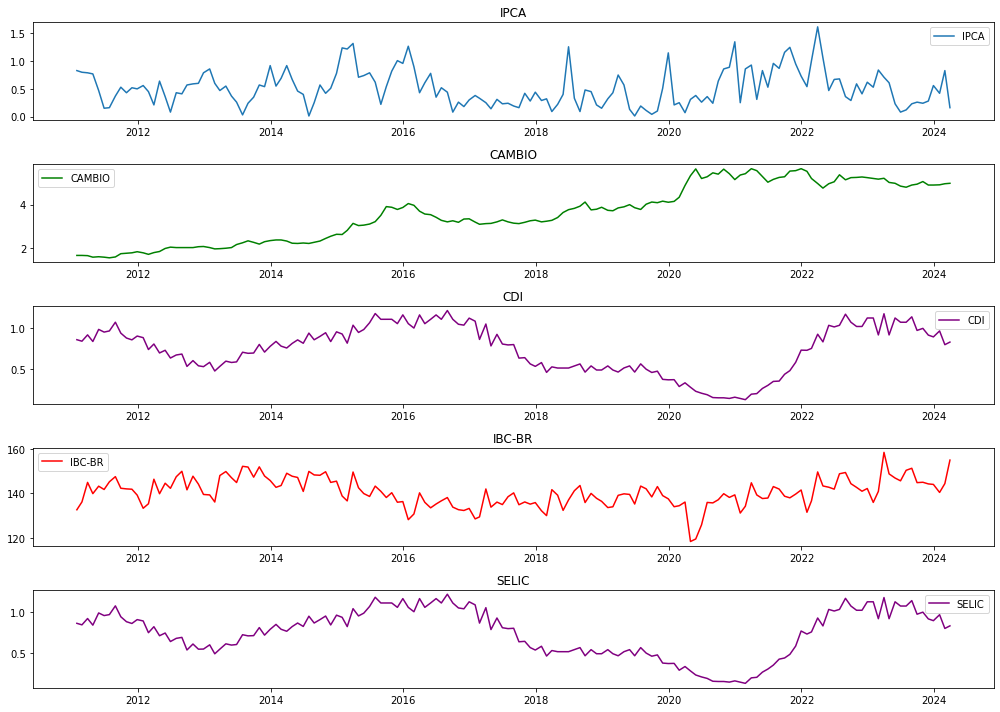

In [6]:
# Plot each time series.
plt.figure(figsize=(14, 10))

plt.subplot(5, 1, 1)
plt.plot(indicadores['Data'] , indicadores['IPCA'], label='IPCA')
plt.title('IPCA')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(indicadores['Data'] ,indicadores['CAMBIO'], label='CAMBIO', color='green')
plt.title('CAMBIO')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(indicadores['Data'] ,indicadores['CDI'], label='CDI', color='purple')
plt.title('CDI')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(indicadores['Data'] ,indicadores['IBC-BR'], label='IBC-BR', color='red')
plt.title('IBC-BR')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(indicadores['Data'] ,indicadores['SELIC'], label='SELIC', color='purple')
plt.title('SELIC')
plt.legend()

plt.tight_layout()
plt.show()

Agora, vamos analisar a estacionariedade da série com o teste de Dickey-Fuller aumentado, se a série for não estacionária vamos aplicar a diferenciação ou a log-diferenciação para torna-la estacionária.

In [11]:
# Function to perform the ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
# Apply the ADF test on each series
print("IPCA:")
adf_test(indicadores['IPCA'])

print("\nCambio:")
adf_test(indicadores['CAMBIO'])

print("\nIBC-BR:")
adf_test(indicadores['IBC-BR'])

print("\nCDI:")
adf_test(indicadores['CDI'])

print("\nSELIC:")
adf_test(indicadores['SELIC'])

print("\nIGP-M:")
adf_test(indicadores['IGP-M'])

IPCA:
Results of Dickey-Fuller Test:
Test Statistic                -6.512229e+00
p-value                        1.093172e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.580000e+02
Critical Value (1%)           -3.472431e+00
Critical Value (5%)           -2.880013e+00
Critical Value (10%)          -2.576619e+00
dtype: float64

Cambio:
Results of Dickey-Fuller Test:
Test Statistic                  -1.212815
p-value                          0.668059
#Lags Used                       1.000000
Number of Observations Used    157.000000
Critical Value (1%)             -3.472703
Critical Value (5%)             -2.880132
Critical Value (10%)            -2.576683
dtype: float64

IBC-BR:
Results of Dickey-Fuller Test:
Test Statistic                  -1.382255
p-value                          0.590753
#Lags Used                      12.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548

- IPCA : Possui uma estatística de teste -6.51 e valor crítico (1%) de -3.47, ou seja, temos um valor de teste menor do que o valor crítico e um p-valor menor que 0.05. Com isso, podemos rejeitar a hipótese nula de não estacionariedade e concluir que a série é estacionária.

- Cambio: Possui um p-valor de 0.66, ou seja, não podemos rejeitar a hipótese nula. Série não estacionária.

- IBC-BR: Possui p-valor de 0.59, série não estacionária.

- CDI: Temos um p-valor de 0.047, um pouco abaixo de 0.05 e uma estatística de teste de -2.87, menor do que o valor crítico em 10%. Isso significa que podemos rejeitar a hipótese nula com um nível de significância de 10%, indicando que a série do CDI é estacionária.

In [10]:
#differenciating CAMBIO e IBC-BR
indicadores['CAMBIO_diff'] = indicadores['CAMBIO'].diff()
indicadores['IBC-BR_diff'] = indicadores['IBC-BR'].diff()
indicadores['SELIC_diff'] = indicadores['SELIC'].diff()

print("\nCambio:")
adf_test(indicadores['CAMBIO_diff'].dropna())

print("\nIBC-BR:")
adf_test(indicadores['IBC-BR_diff'].dropna())


print("\nSELIC:")
adf_test(indicadores['SELIC_diff'].dropna()) #ela piora sendo diferenciada?????????????


Cambio:
Results of Dickey-Fuller Test:
Test Statistic                -9.970865e+00
p-value                        2.242345e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.570000e+02
Critical Value (1%)           -3.472703e+00
Critical Value (5%)           -2.880132e+00
Critical Value (10%)          -2.576683e+00
dtype: float64

IBC-BR:
Results of Dickey-Fuller Test:
Test Statistic                  -4.101802
p-value                          0.000962
#Lags Used                      11.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64

SELIC:
Results of Dickey-Fuller Test:
Test Statistic                  -2.654397
p-value                          0.082267
#Lags Used                      11.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.8815

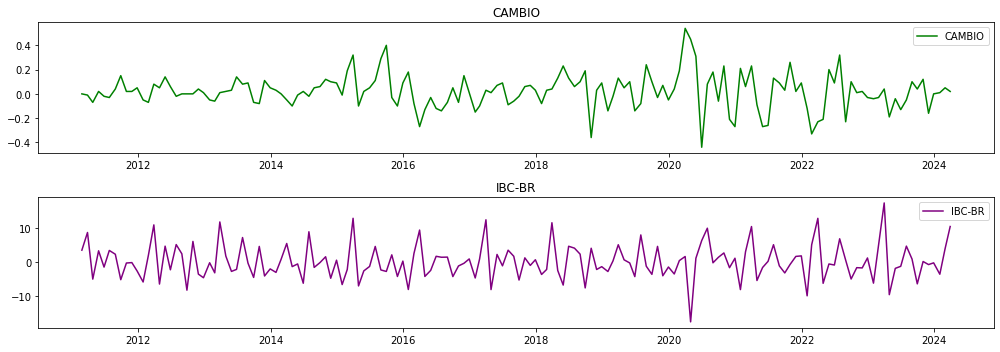

In [8]:
plt.figure(figsize=(14, 5))

plt.subplot(2, 1, 1)
plt.plot(indicadores['Data'] ,indicadores['CAMBIO_diff'], label='CAMBIO', color='green')
plt.title('CAMBIO')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(indicadores['Data'] ,indicadores['IBC-BR_diff'], label='IBC-BR', color='purple')
plt.title('IBC-BR')
plt.legend()

plt.tight_layout()
plt.show()

Portanto, temos que indicadores['IPCA'], indicadores['CAMBIO_diff'], indicadores['IBC-BR_diff'] e indicadores['CDI'] são estacionários. Agora vamos analisar a correlação entre eles.

In [13]:
#create a new dataframe with indicadores['IPCA'], indicadores['CAMBIO_diff'], indicadores['IBC-BR_diff'] and indicadores['CDI']
new_df = indicadores.loc[:, ['IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'CDI','SELIC', 'IGP-M', 'DUMMY']]
new_df = new_df.dropna()
new_df

,IPCA,CAMBIO_diff,IBC-BR_diff,CDI,SELIC,IGP-M,DUMMY
1,0.80,0.00,3.52,0.842429,0.843905,1.00,0
2,0.79,-0.01,8.75,0.918851,0.920465,0.62,0
3,0.77,-0.07,-5.04,0.838800,0.840161,0.45,0
4,0.47,0.02,3.34,0.985266,0.987988,0.43,0
5,0.15,-0.02,-1.48,0.952666,0.956276,-0.18,0
...,...,...,...,...,...,...,...
154,0.28,-0.16,-0.74,0.915991,0.915991,0.59,0
155,0.56,0.00,-0.23,0.894529,0.894529,0.74,0
156,0.42,0.01,-3.59,0.966696,0.966696,0.07,0
157,0.83,0.05,3.97,0.800208,0.800208,-0.52,0


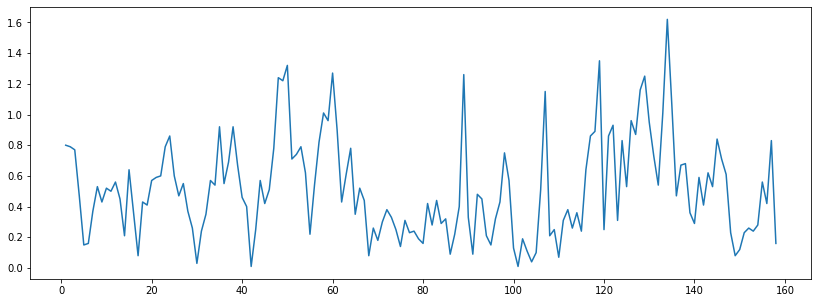

In [14]:
plt.figure(figsize=(14, 5)) 
plt.plot(new_df['IPCA'], label='IPCA')

In [15]:
#calculating the correlation matrix of the new dataframe
correlation_matrix = new_df.corr()
correlation_matrix

,IPCA,CAMBIO_diff,IBC-BR_diff,CDI,SELIC,IGP-M,DUMMY
IPCA,1.000000,-0.085581,0.063397,-0.006094,-0.004209,0.373740,0.306642
CAMBIO_diff,-0.085581,1.000000,-0.070746,-0.096327,-0.095265,-0.034637,0.014394
IBC-BR_diff,0.063397,-0.070746,1.000000,0.049463,0.049786,0.058237,0.011161
CDI,-0.006094,-0.096327,0.049463,1.000000,0.999694,-0.456352,-0.529250
SELIC,-0.004209,-0.095265,0.049786,0.999694,1.000000,-0.457562,-0.529574
IGP-M,0.373740,-0.034637,0.058237,-0.456352,-0.457562,1.000000,0.509002
DUMMY,0.306642,0.014394,0.011161,-0.529250,-0.529574,0.509002,1.000000


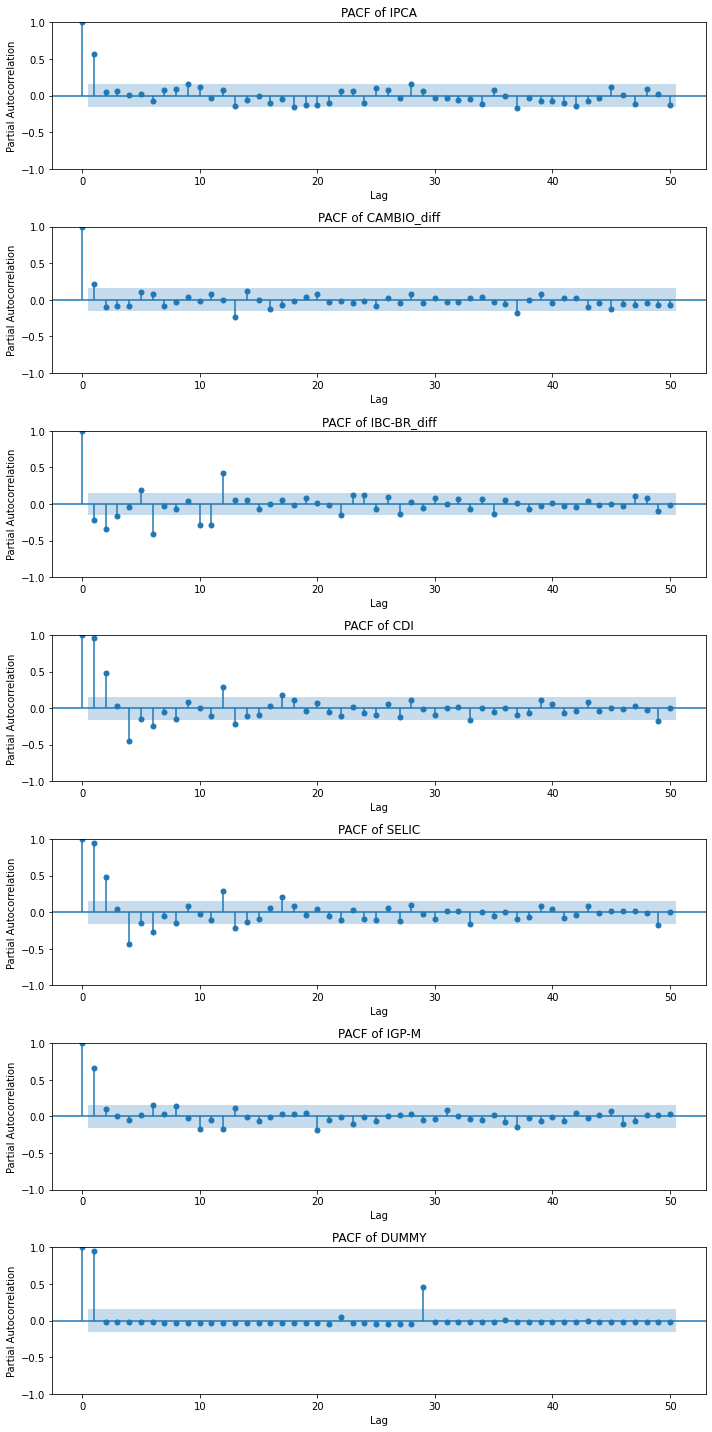

In [16]:
#calculating the PACF of every variable of the new dataframe
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Calculate PACF for each variable
fig, axes = plt.subplots(len(new_df.columns), 1, figsize=(10, 20))
for i, col in enumerate(new_df.columns):
    plot_pacf(new_df[col], ax=axes[i], lags=50)
    axes[i].set_title(f'PACF of {col}')
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

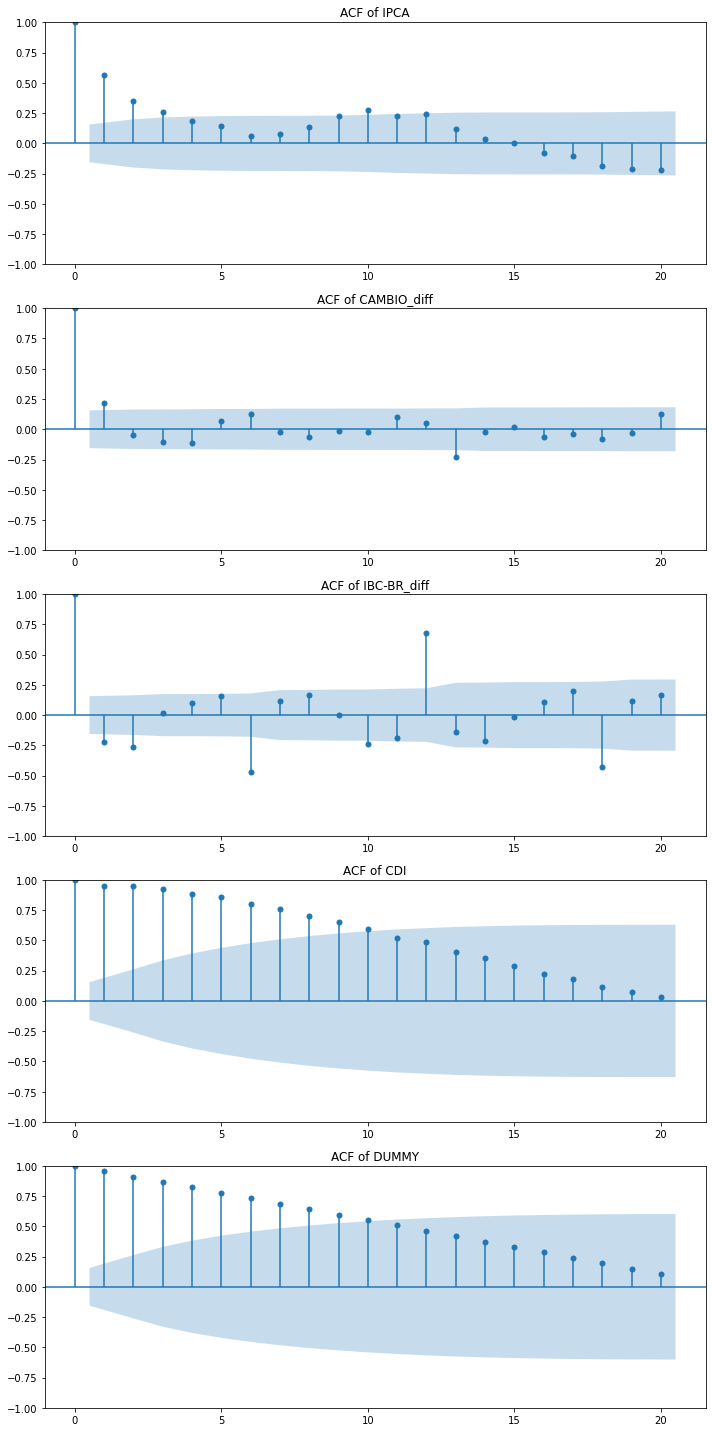

In [15]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Create subplots
fig, axes = plt.subplots(nrows=len(new_df.columns), figsize=(10, 20))

# Plot ACF for each variable
for i, column in enumerate(new_df.columns):
    plot_acf(new_df[column], ax=axes[i], lags=20)
    axes[i].set_title(f"ACF of {column}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Estatísticas descritivas:

In [16]:
#estatisticas descritivas de cada variavel de new_df
new_df.describe()


,IPCA,CAMBIO_diff,IBC-BR_diff,CDI,DUMMY
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.514684,0.020949,0.140886,0.741664,0.177215
std,0.322575,0.142564,5.192110,0.288397,0.383065
min,0.010000,-0.440000,-17.680000,0.134532,0.000000
25%,0.260000,-0.050000,-2.985000,0.532227,0.000000
50%,0.455000,0.020000,-0.270000,0.798681,0.000000
75%,0.710000,0.090000,2.525000,0.981111,0.000000
max,1.620000,0.540000,17.490000,1.213600,1.000000


Vamos analisar os histogramas:

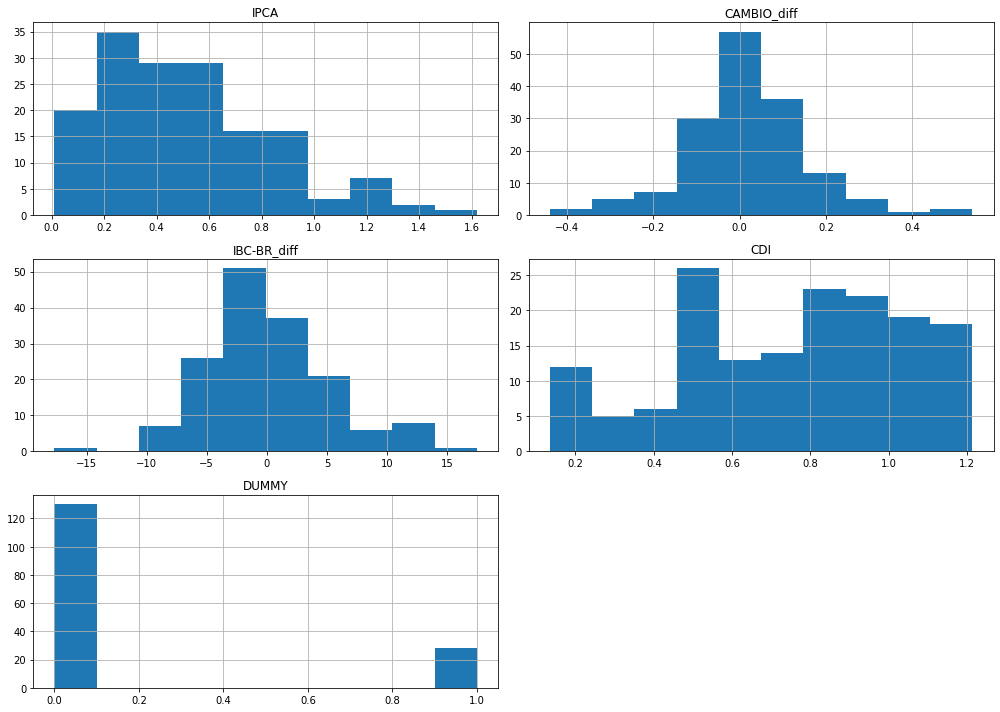

In [17]:
new_df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

Os histogramas de CDI e IPCA não são simétricos, 

In [ ]:
import statsmodels.api as sm

# Define the independent variables
X = df[['IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'CDI', 'DUMMY']]

# Add a constant term to the independent variables
#X = sm.add_constant(X)

# Define the dependent variable
y = df['LN_DIFF_SBSP']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

In [ ]:
data_suav = pd.DataFrame({'SBSP_suav': SBSP_suav,
                    'CDI_suav': CDI_suav,
                    'IBCBR_suav':IBCBR_suav,
                    'IPCA_suav': IPCA_suav,
                    'CAMBIO_suav' : CAMBIO_suav,
                    'DUMMY': df['DUMMY']
                    })
data_suav = data_suav.dropna()
#data

In [ ]:
y = data_suav['SBSP_suav']
X = data_suav[['CAMBIO_suav','DUMMY' , 'IPCA_suav', 'CDI_suav', 'IBCBR_suav' ]] 
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot 1
axes[0, 0].scatter( data_suav['IPCA_suav'], data_suav['SBSP_suav'])
axes[0, 0].set_xlabel('SBSP_diff')
axes[0, 0].set_ylabel('IPCA')

# Scatter plot 2
axes[0, 1].scatter( data_suav['CAMBIO_suav'], data_suav['SBSP_suav'], color='green')
axes[0, 1].set_xlabel('SBSP_diff')
axes[0, 1].set_ylabel('CAMBIO_diff')

# Scatter plot 3
axes[1, 0].scatter(data_suav['IBCBR_suav'] ,data_suav['SBSP_suav'], color='red')
axes[1, 0].set_xlabel('SBSP_diff')
axes[1, 0].set_ylabel('IBC-BR_diff')

# Scatter plot 4
axes[1, 1].scatter( data_suav['CDI_suav'], data_suav['SBSP_suav'], color='purple')
axes[1, 1].set_xlabel('SBSP_diff')
axes[1, 1].set_ylabel('CDI')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()